# Data Descripition

- Item_Identifier: Unique product ID
- Item_Weight: Weight of product
- Item_Fat_Content: Whether the product is low fat or not
- Item_Visibility: The % of total display area of all products in a store allocated to the
- particular product
- Item_Type: The category to which the product belongs
- Item_MRP: Maximum Retail Price (list price) of the product
- Outlet_Identifier: Unique store ID
- Outlet_Establishment_Year: The year in which store was established
- Outlet_Size: The size of the store in terms of ground area covered
- Outlet_Location_Type: The type of city in which the store is located
- Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
- Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome

## Import Libaraies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

import warnings 
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.shape

(8523, 12)

In [5]:
test = pd.read_csv("test.csv")

In [6]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
test.shape

(5681, 11)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [10]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [12]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [14]:
train.isnull().sum()/train.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [15]:
test.isnull().sum()/test.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

In [16]:
train.duplicated().sum()

0

In [17]:
test.duplicated().sum()

0

## Data cleaning

In [18]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<AxesSubplot:xlabel='Item_Weight'>

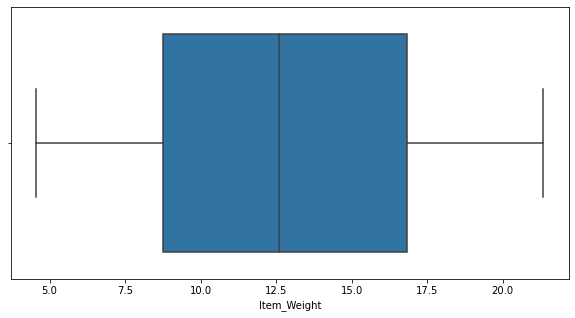

In [19]:
plt.figure(figsize=(10 ,5))
sns.boxplot(data=train , x="Item_Weight")

<AxesSubplot:xlabel='Item_Weight'>

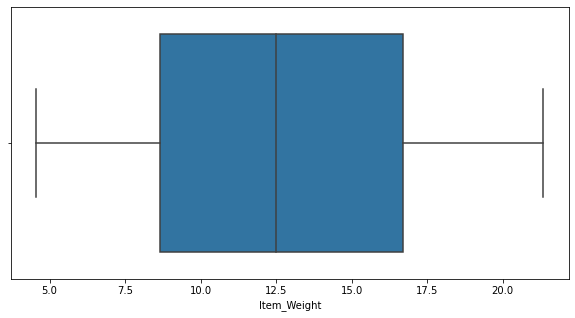

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(data=test , x="Item_Weight")

observation we can see that there are no outliers so we can impute missing values with mean

In [21]:
mean_train = train["Item_Weight"].mean()
print(mean_train)

12.857645184135976


In [22]:
mean_test = test["Item_Weight"].mean()
mean_test

12.695633368756642

In [23]:
train["Item_Weight"] = train["Item_Weight"].fillna(mean_train)
test["Item_Weight"] = test["Item_Weight"].fillna(mean_test)

In [24]:
train["Item_Weight"].isnull().sum() , test["Item_Weight"].isnull().sum()

(0, 0)

In [25]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [26]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

 we successfully replace missing values with mean from the column Item Weight

In [27]:
print(train["Outlet_Size"].value_counts())
print("***************************")
print(test["Outlet_Size"].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
***************************
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


Outlet size columns is categorical column so we can replace with mode

In [28]:
mode_train = train["Outlet_Size"].mode()
print(mode_train)

0    Medium
dtype: object


In [29]:
mode_test = test["Outlet_Size"].mode()
print(mode_test)

0    Medium
dtype: object


In [30]:
train["Outlet_Size"] = train["Outlet_Size"].fillna(mode_train[0])
test["Outlet_Size"] = test["Outlet_Size"].fillna(mode_test[0])

In [31]:
train["Outlet_Size"].isnull().sum() , test["Outlet_Size"].isnull().sum()

(0, 0)

In [32]:
train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [33]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [34]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

 we successfully replace missing values with mode from the column Outlet size

In [35]:
train["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [36]:
test["Item_Fat_Content"].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [37]:
train["Item_Fat_Content"].replace(["low fat", "LF", "reg"], ["Low Fat", "Low Fat", "Regular"], inplace=True)
test["Item_Fat_Content"].replace(["low fat", "LF", "reg"], ["Low Fat", "Low Fat", "Regular"], inplace=True)

In [38]:
train["Item_Fat_Content"].unique() , test["Item_Fat_Content"].unique()

(array(['Low Fat', 'Regular'], dtype=object),
 array(['Low Fat', 'Regular'], dtype=object))

In [39]:
train["Item_Fat_Content"] = train["Item_Fat_Content"].astype(str)

In [40]:
train["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [41]:
test["Item_Type"].unique()

array(['Snack Foods', 'Dairy', 'Others', 'Fruits and Vegetables',
       'Baking Goods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
       'Seafood', 'Soft Drinks', 'Household', 'Frozen Foods', 'Meat',
       'Canned', 'Starchy Foods', 'Breakfast'], dtype=object)

In [42]:
print(train["Outlet_Establishment_Year"].unique())

[1999 2009 1998 1987 1985 2002 2007 1997 2004]


In [43]:
print(test["Outlet_Establishment_Year"].unique())

[1999 2007 1998 1985 1997 2009 2002 1987 2004]


In [44]:
train["Outlet_Establishment_Year"] = train["Outlet_Establishment_Year"].apply(lambda x: 2022 - x)
test["Outlet_Establishment_Year"] = test["Outlet_Establishment_Year"].apply(lambda x: 2022 - x)

In [45]:
train.sample(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3167,FDL51,20.70,Regular,0.047482,Dairy,215.9876,OUT035,18,Small,Tier 2,Supermarket Type1,3430.2016
1738,NCR18,15.85,Low Fat,0.020488,Household,44.0112,OUT046,25,Small,Tier 1,Supermarket Type1,468.7232
2299,FDR02,16.70,Low Fat,0.022110,Dairy,110.8886,OUT045,20,Medium,Tier 2,Supermarket Type1,3558.0352


In [46]:
train["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [47]:
train["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

# Explolatary Data Analysis

## A ) Univariate Analysis

In [48]:
train["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

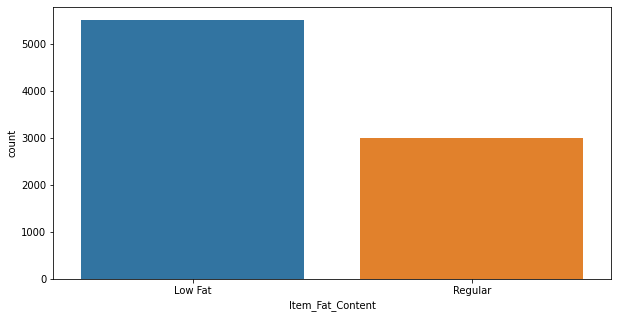

In [49]:
plt.figure(figsize=(10 , 5))
sns.countplot(x="Item_Fat_Content" , data=train)

 Low fat items are more sold then regular one

In [50]:
train["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [51]:
train["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Item_Type'>

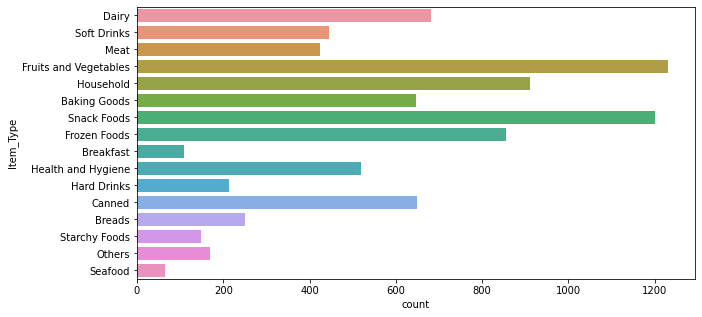

In [52]:
plt.figure(figsize=(10, 5))
sns.countplot(y="Item_Type" , data=train)

frutis , vegs and the snack foods are most sold items while the sea foods are the least

In [53]:
train["Outlet_Establishment_Year"].value_counts()

37    1463
35     932
23     930
25     930
18     930
20     929
13     928
15     926
24     555
Name: Outlet_Establishment_Year, dtype: int64

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

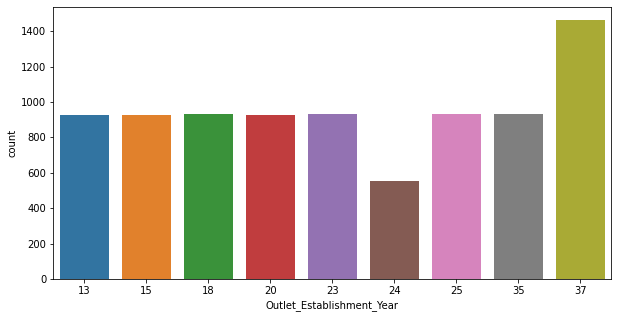

In [54]:
plt.figure(figsize=(10 , 5))
sns.countplot(x="Outlet_Establishment_Year", data=train)

 outlet are establish and running from 37 years

In [55]:
train["Outlet_Size"].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

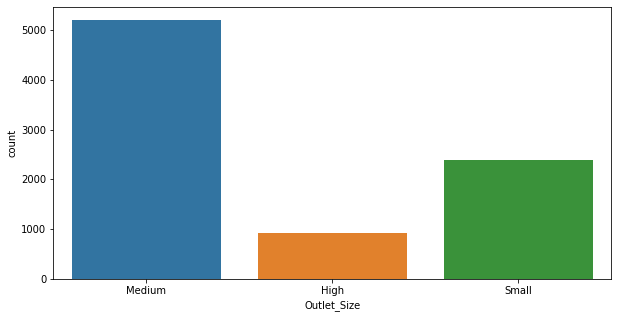

In [56]:
plt.figure(figsize=(10 , 5))
sns.countplot(x="Outlet_Size", data=train)

outlet size medium have more and high outlet size are least

In [57]:
train["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

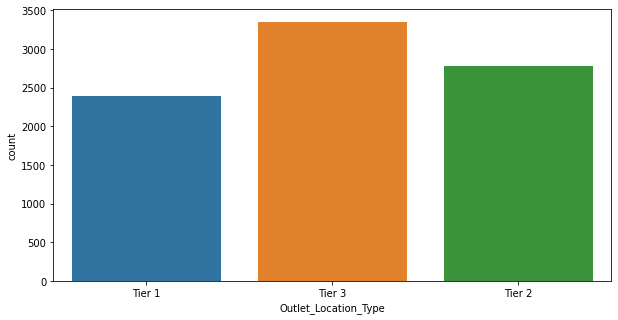

In [58]:
plt.figure(figsize=(10 , 5))
sns.countplot(x="Outlet_Location_Type", data=train)

 tier 3 have the most stores and then tier 2 and last comes at tier 1

In [59]:
train["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

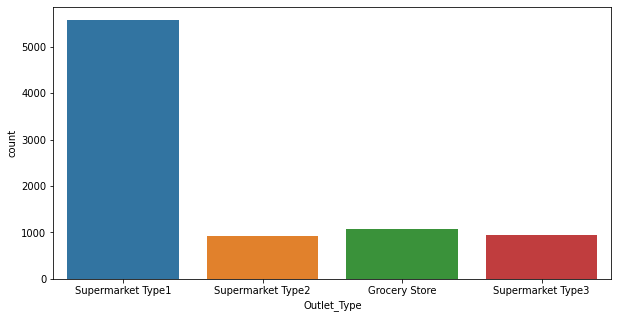

In [60]:
plt.figure(figsize=(10 , 5))
sns.countplot(x="Outlet_Type", data=train)

there are more Supermarket type 1 market 

## B) Bivariate Analysis

In [61]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

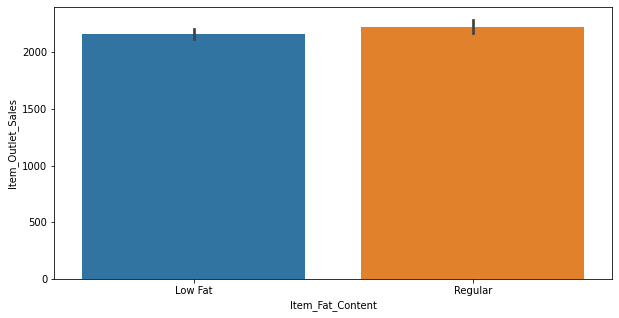

In [62]:
plt.figure(figsize=(10 , 5))
sns.barplot(x="Item_Fat_Content", y="Item_Outlet_Sales", data=train)

the outlet size are both high on low fat as well as regular

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

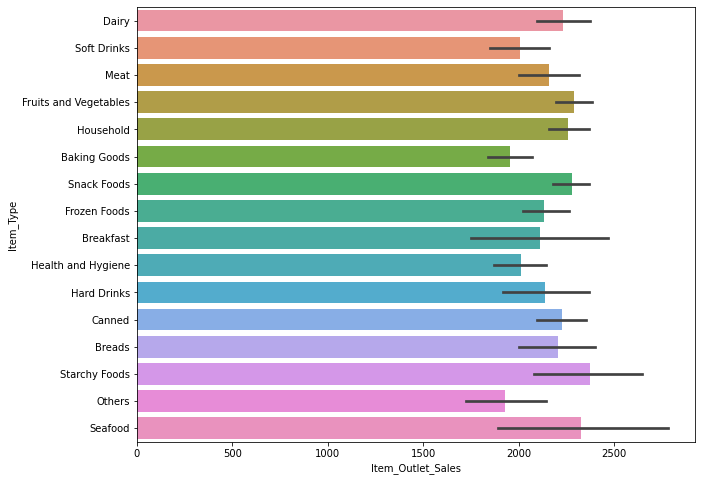

In [63]:
plt.figure(figsize=(10 , 8))
sns.barplot(y="Item_Type" , x="Item_Outlet_Sales", data=train)

item type like seafood and starchy foods have the maximum sales as compare to others

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

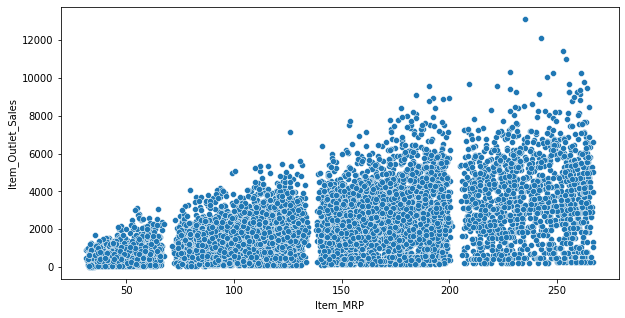

In [64]:
plt.figure(figsize=(10 , 5))
sns.scatterplot(x = "Item_MRP" , y="Item_Outlet_Sales", data=train)

as the mrp increases sales also increases

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

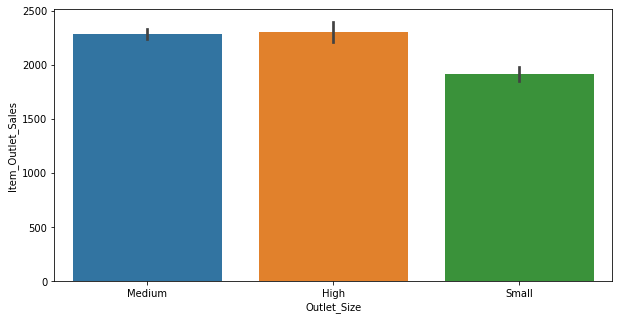

In [65]:
plt.figure(figsize=(10 , 5))
sns.barplot(x="Outlet_Size", y= "Item_Outlet_Sales", data=train)

medium and high size outlet have the maximum sales as compare to small ones

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

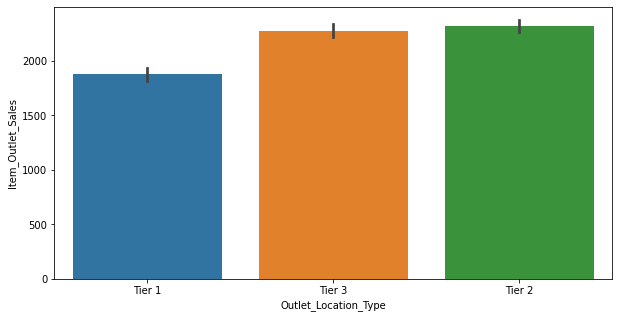

In [66]:
plt.figure(figsize=(10 , 5))
sns.barplot(x = "Outlet_Location_Type" , y = "Item_Outlet_Sales", data=train)

tier 2 and tier 3 have the maximum no. of sales

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

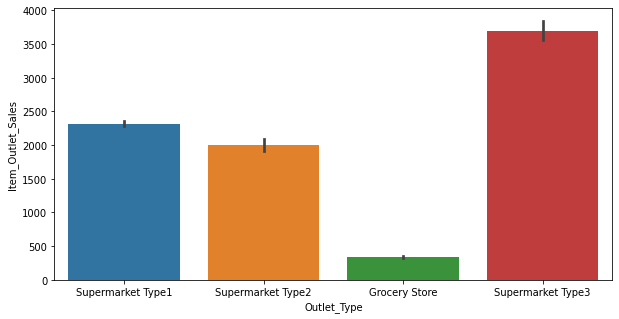

In [67]:
plt.figure(figsize=(10 , 5))
sns.barplot("Outlet_Type" ,"Item_Outlet_Sales" , data=train)

supermarket 3 have the maximum no. of sales and least sales have the grocery store

## C ) Multivariate Analysis

In [68]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

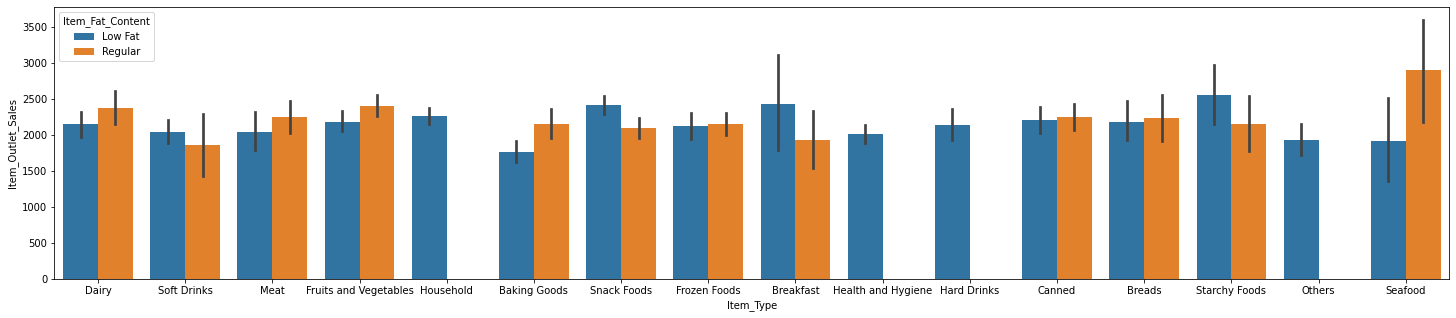

In [69]:
plt.figure(figsize=(25 , 5))
sns.barplot(x="Item_Type" , y = "Item_Outlet_Sales", hue="Item_Fat_Content", data=train)

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

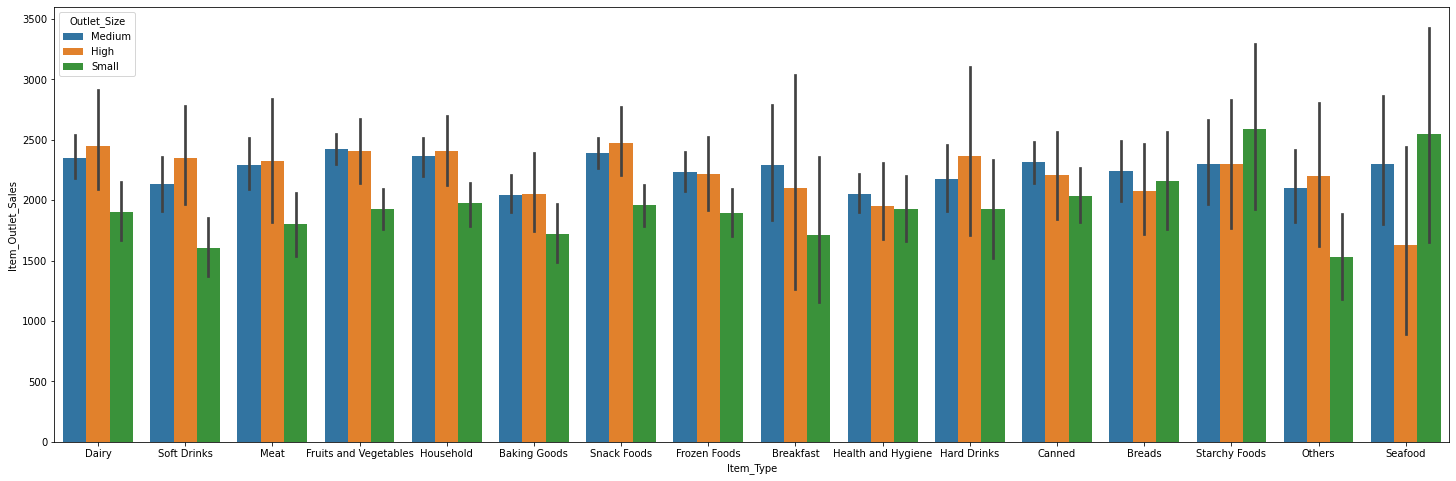

In [70]:
plt.figure(figsize=(25, 8))
sns.barplot(x="Item_Type", y="Item_Outlet_Sales", hue="Outlet_Size", data=train)

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

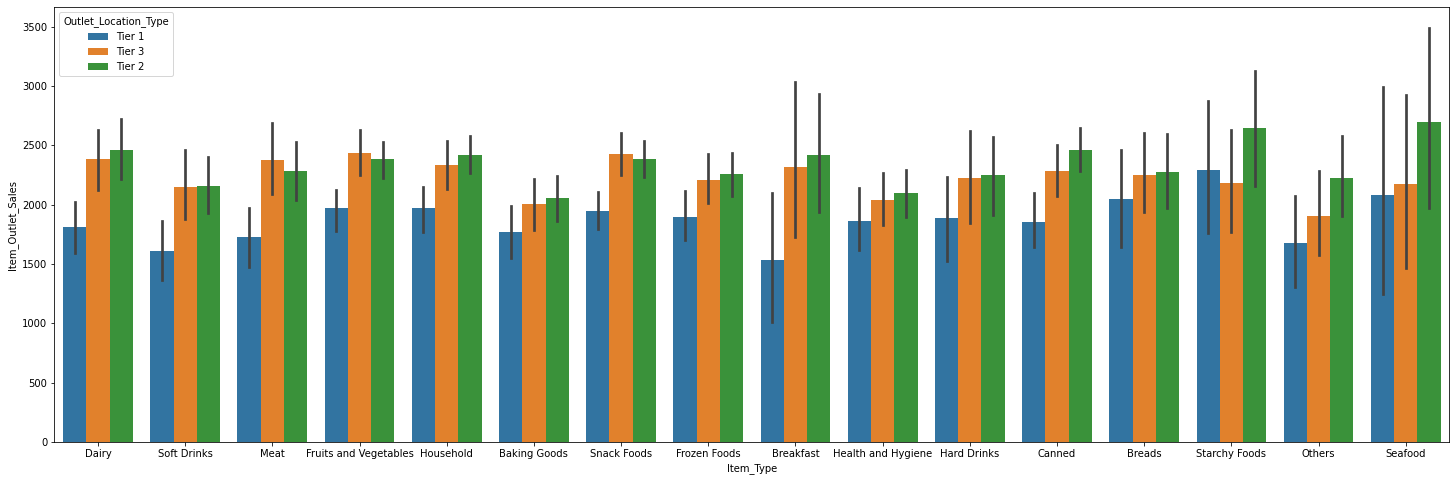

In [71]:
plt.figure(figsize=(25, 8))
sns.barplot(x="Item_Type", y="Item_Outlet_Sales", hue="Outlet_Location_Type", data=train)

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

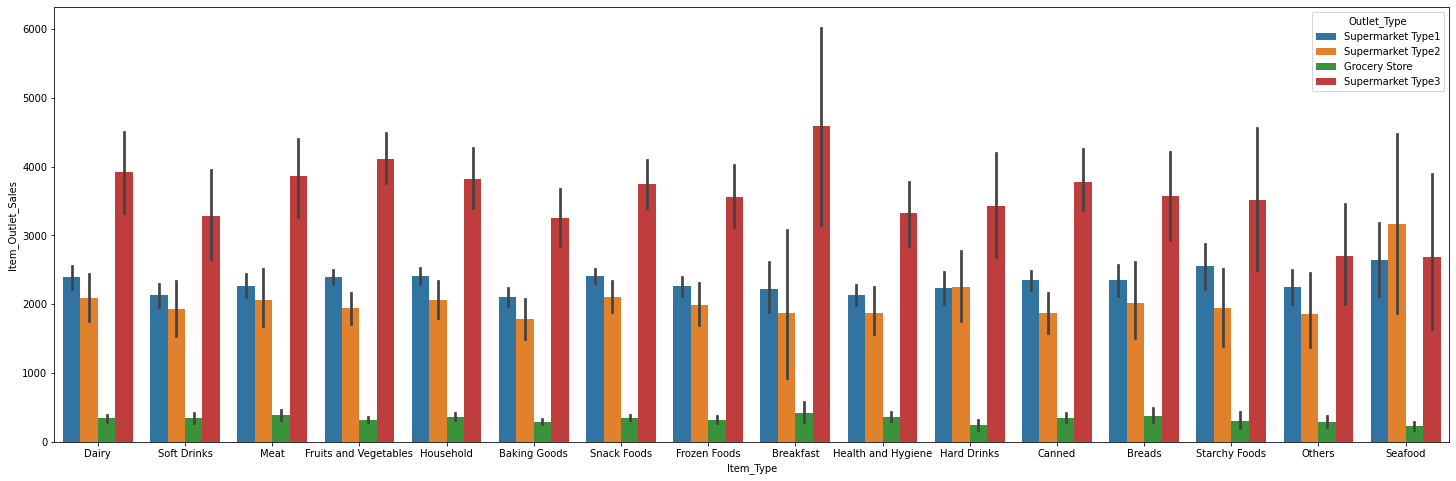

In [72]:
plt.figure(figsize=(25, 8))
sns.barplot(x="Item_Type", y="Item_Outlet_Sales", hue="Outlet_Type", data=train)

# Feature Engineering

In [73]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## LabelEncoding

In [74]:
le = LabelEncoder()

In [75]:
char = ["Item_Fat_Content","Item_Type" , "Outlet_Size","Outlet_Location_Type", "Outlet_Type"]

In [76]:
for i in char:
    train[i] = le.fit_transform(train[i])

In [77]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,23,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,13,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,23,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,6,182.0950,OUT010,24,1,2,0,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,OUT013,35,0,2,1,994.7052


In [78]:
for i in char:
    test[i] = le.fit_transform(test[i])

In [79]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,0,0.007565,13,107.8622,OUT049,23,1,0,1
1,FDW14,8.300000,1,0.038428,4,87.3198,OUT017,15,1,1,1
2,NCN55,14.600000,0,0.099575,11,241.7538,OUT010,24,1,2,0
3,FDQ58,7.315000,0,0.015388,13,155.0340,OUT017,15,1,1,1
4,FDY38,12.695633,1,0.118599,4,234.2300,OUT027,37,1,2,3


In [80]:
train["Item_Type"].unique()

array([ 4, 14, 10,  6,  9,  0, 13,  5,  2,  8,  7,  3,  1, 15, 11, 12])

In [81]:
train.drop(["Item_Identifier", "Outlet_Identifier", "Outlet_Establishment_Year" , "Item_Visibility"], axis=1 , inplace=True)

In [82]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,4,249.8092,1,0,1,3735.1380
1,5.92,1,14,48.2692,1,2,2,443.4228
2,17.50,0,10,141.6180,1,0,1,2097.2700
3,19.20,1,6,182.0950,1,2,0,732.3800
4,8.93,0,9,53.8614,0,2,1,994.7052


In [83]:
test.drop(["Item_Identifier", "Outlet_Identifier", "Outlet_Establishment_Year", "Item_Visibility"], axis=1 , inplace=True)

In [84]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,13,107.8622,1,0,1
1,8.300000,1,4,87.3198,1,1,1
2,14.600000,0,11,241.7538,1,2,0
3,7.315000,0,13,155.0340,1,1,1
4,12.695633,1,4,234.2300,1,2,3


## creating X and y variable

In [85]:
x = train.drop("Item_Outlet_Sales", axis=1)
y = train["Item_Outlet_Sales"]

In [86]:
x.shape , y.shape

((8523, 7), (8523,))

In [87]:
x_train ,x_test, y_train , y_test = train_test_split(x , y , test_size=0.3)

In [88]:
x_train.shape , x_test.shape

((5966, 7), (2557, 7))

## Standardization

In [89]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Model Building

### Linear Regression

In [90]:
lr = LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

In [91]:
y_pred = lr.predict(x_test)

In [92]:
y_pred

array([2719.84849232, 3966.60172986, 2163.42698074, ..., 2247.41985694,
       5660.90528604, 2487.41431784])

In [93]:
rf = RandomForestRegressor()

In [94]:
rf.fit(x_train , y_train)

RandomForestRegressor()

In [95]:
rf.predict(x_test)

array([2817.23283 , 3859.682548, 1968.590834, ..., 3294.225266,
       4825.372184, 2029.052132])

In [96]:
rf.score(x_test , y_test)

0.5241330631946182

# Hyperparameter Tunning

### RandomizedSearchCV

In [97]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [98]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [99]:
rf = RandomForestRegressor()

random_forest = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 5)

In [100]:
random_forest.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=5,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [101]:
random_forest.best_params_

{'n_estimators': 300,
 'min_samples_split': 100,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [102]:
random_forest.best_estimator_

RandomForestRegressor(max_depth=15, max_features='auto', min_samples_leaf=5,
                      min_samples_split=100, n_estimators=300)

In [103]:
rf_best_grid = random_forest.best_estimator_

In [104]:
rf_best_grid.predict(x_test)

array([3071.60083997, 3447.49082131, 1995.85030749, ..., 2661.24405102,
       6557.60659816, 2343.87173176])

In [105]:
rf_best_grid.score(x_test , y_test)

0.5909731342372204

## save pickle model

In [106]:
import pickle
file = "rf_model.pkl"
pickle.dump(rf_best_grid, open(file , "wb"))

## save scalar model

In [107]:
sc_file = "scalar.pkl"
pickle.dump(sc, open(sc_file, "wb"))